In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando os dados coletados da primeira página e limpando os resultados. O campo local foi separado em dois: cidade e UF. Já no campo receita os símbolos foram removidos e o formato foi transformado para numérico (antes estava como texto).

In [2]:
def load_main_data(file_path):
    '''
    Função que carrega os dados coletadas no primeiro nível do crawler
    carregando os dados com os nomes das empresas, link para o segundo nível,
    localização da empresa e redimento em milhões no ano.
    
    Os dados são carregados de um arquivo pickle, contendo uma lista de dicionários
    com os dados, onde as chaves são os nomes das variáveis e os valores os conteúdos.
    
    Os dados são carregados em um dataframe com a biblioteca pandas e em seguida os dados são limpos:
      - a receita é transformada em número (float) e o símbolo '$' e a letra 'M' são removidos de
        todos os registros.
      - a cidade é extraída do campo local (primeira parte antes da vírgula)
      - o UF é extraído do local sendo a parte intermediária do local separados por vírgulas
      - o nome das empresas são reformatadas para o formato título (primeiras letras de cada palavra
        como tamanho maiúsculo)
    '''
    with open(file_path, "rb") as file:
        regs_data = pickle.load(file)
    df = pd.DataFrame(regs_data)
    df['receita_milhao'] = df['receita'].str.strip('$|M').astype('float')
    df['cidade'] = df['local'].str.split(',').apply(lambda x: x[0]).str.strip()
    df['uf'] = df['local'].str.split(',').apply(lambda x: x[1]).str.strip()
    df['empresa_nome'] = df['empresa_nome'].str.title()
    return df[['empresa_nome', 'receita_milhao', 'cidade', 'uf', 'empresa_href']]


file_path = r'data\test_scrap.pickle'
main_df = load_main_data(file_path)

Testando se todos os links (empresa_href) começam com um link válido. Um endereço válido começaria com: 'https://www.dnb.com/business-directory/company-profiles'

In [3]:
main_df['empresa_href'].str.startswith('https://www.dnb.com/business-directory/company-profiles').all()

True

In [4]:
def load_desc_data(file_path):
    with open(file_path, "rb") as file:
        regs_data = pickle.load(file)
    df = pd.DataFrame(regs_data)
    
    df['descricao'] = (df['descricao'].
                       str.strip('<span class="company_summary">').
                       str.split('\n<br><br>\n', expand=True)[0].
                       str.replace('&amp;', '&').str.strip())
    
    df['industria'] = df['industria'].str.join('; ')
    df.rename(columns={'url': 'empresa_href'}, inplace=True)
    
    return df[['empresa_href', 'descricao', 'industria']]

file_path = r'data\inner_scrap.pickle'
desc_df = load_desc_data(file_path)

In [5]:
desc_df

,empresa_href,descricao,industria
0,https://www.dnb.com/business-directory/company...,Tres Coracoes Alimentos S/A is located in EUSE...,Coffee & Tea Manufacturing; Manufacturing Sect...
1,https://www.dnb.com/business-directory/company...,Cafe Tres Coracoes S/A is located in SANTA LUZ...,Coffee & Tea Manufacturing; Manufacturing Sect...
2,https://www.dnb.com/business-directory/company...,COOPERATIVA DOS CAFEICULTORES DA ZONA DE TRES ...,Coffee & Tea Manufacturing; Manufacturing Sect...
3,https://www.dnb.com/business-directory/company...,Companhia Cacique de Café Solúvel is located i...,Coffee & Tea Manufacturing; Manufacturing Sect...
4,https://www.dnb.com/business-directory/company...,Cia Iguacu de Cafe Soluvel is located in CORNE...,Coffee & Tea Manufacturing; Manufacturing Sect...
...,...,...,...
995,https://www.dnb.com/business-directory/company...,COMERCIAL CEREAIS ORGULHO DE MINAS LTDA is loc...,Coffee & Tea Manufacturing; Manufacturing Sect...
996,https://www.dnb.com/business-directory/company...,COMERCIO TORREFACAO E MOAGEM DE CAFE COLNAGO L...,Coffee & Tea Manufacturing; Manufacturing Sect...
997,https://www.dnb.com/business-directory/company...,CAFE CINCO ESTRELAS INDUSTRIA E COMERCIO LTDA ...,Coffee & Tea Manufacturing; Manufacturing Sect...
998,https://www.dnb.com/business-directory/company...,CAFEEIRA CASSANHO INDUSTRIA E COMERCIO LTDA is...,Coffee & Tea Manufacturing; Manufacturing Sect...


In [6]:
df = pd.merge(main_df, desc_df)

In [7]:
df

,empresa_nome,receita_milhao,cidade,uf,empresa_href,descricao,industria
0,Tres Coracoes Alimentos S/A,677.42,Eusebio,Ceara,https://www.dnb.com/business-directory/company...,Tres Coracoes Alimentos S/A is located in EUSE...,Coffee & Tea Manufacturing; Manufacturing Sect...
1,Cafe Tres Coracoes S/A,271.06,Santa Luzia,Minas Gerais,https://www.dnb.com/business-directory/company...,Cafe Tres Coracoes S/A is located in SANTA LUZ...,Coffee & Tea Manufacturing; Manufacturing Sect...
2,Cooperativa Dos Cafeicultores Da Zona De Tres ...,207.52,Três Pontas,Minas Gerais,https://www.dnb.com/business-directory/company...,COOPERATIVA DOS CAFEICULTORES DA ZONA DE TRES ...,Coffee & Tea Manufacturing; Manufacturing Sect...
3,Companhia Cacique De Café Solúvel,198.58,Londrina,Parana,https://www.dnb.com/business-directory/company...,Companhia Cacique de Café Solúvel is located i...,Coffee & Tea Manufacturing; Manufacturing Sect...
4,Cia Iguacu De Cafe Soluvel,138.02,Cornelio Procopio,Parana,https://www.dnb.com/business-directory/company...,Cia Iguacu de Cafe Soluvel is located in CORNE...,Coffee & Tea Manufacturing; Manufacturing Sect...
...,...,...,...,...,...,...,...
995,Comercial Cereais Orgulho De Minas Ltda,0.43,Patos De Minas,Minas Gerais,https://www.dnb.com/business-directory/company...,COMERCIAL CEREAIS ORGULHO DE MINAS LTDA is loc...,Coffee & Tea Manufacturing; Manufacturing Sect...
996,Comercio Torrefacao E Moagem De Cafe Colnago Ltda,0.43,Anhumas,Sao Paulo,https://www.dnb.com/business-directory/company...,COMERCIO TORREFACAO E MOAGEM DE CAFE COLNAGO L...,Coffee & Tea Manufacturing; Manufacturing Sect...
997,Cafe Cinco Estrelas Industria E Comercio Ltda,0.43,Sao Pedro Dos Ferros,Minas Gerais,https://www.dnb.com/business-directory/company...,CAFE CINCO ESTRELAS INDUSTRIA E COMERCIO LTDA ...,Coffee & Tea Manufacturing; Manufacturing Sect...
998,Cafeeira Cassanho Industria E Comercio Ltda,0.43,Piraju,Sao Paulo,https://www.dnb.com/business-directory/company...,CAFEEIRA CASSANHO INDUSTRIA E COMERCIO LTDA is...,Coffee & Tea Manufacturing; Manufacturing Sect...


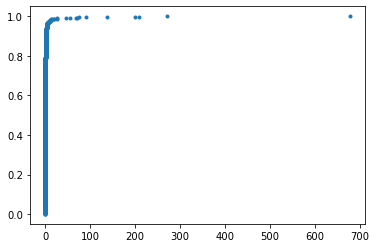

In [22]:
def ecdf(data):
    x = data.sort_values()
    y = np.arange(1, len(data) + 1) / len(data)
    
    return x, y

thereshold = 2000
data = df.loc[df['receita_milhao'] < thereshold, 'receita_milhao']
x, y = ecdf(data)
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

In [ ]:
plt.blo

In [16]:
df['receita_milhao'].sort_values()

499      0.43
658      0.43
659      0.43
660      0.43
661      0.43
        ...  
4      138.02
3      198.58
2      207.52
1      271.06
0      677.42
Name: receita_milhao, Length: 1000, dtype: float64

In [153]:
df.to_csv('cafe_data.csv', sep=';', encoding='UTF-8')

In [162]:
df['industria'].str.split('; ').explode().reset_index().drop_duplicates()['industria'].value_counts()

Manufacturing Sector                    1000
Coffee & Tea Manufacturing              1000
Roasted coffee                          1000
Groceries and related products, nec        4
NonMetallic mineral products,              1
Grain and field beans                      1
Special warehousing and storage, nec       1
Real estate agents and managers            1
Holding companies, nec                     1
Grocery stores                             1
Macaroni and spaghetti                     1
Food preparations, nec                     1
Name: industria, dtype: int64

In [166]:
uf_df = df.groupby('uf').agg({'receita_milhao': 'sum', 'empresa_nome': 'count'})
uf_df.rename(columns={'empresa_nome': 'n_empresas'}, inplace=True)
uf_df['receita_media'] = uf_df['receita_milhao'] / uf_df['n_empresas']
uf_df.sort_values(by='receita_milhao', ascending=False, inplace=True)
uf_df

,receita_milhao,n_empresas,receita_media
uf,,,
Minas Gerais,831.60,400,2.079000
Ceara,701.09,9,77.898889
Parana,428.65,67,6.397761
Sao Paulo,356.36,162,2.199753
Espirito Santo,115.51,55,2.100182
Sergipe,72.02,7,10.288571
Bahia,56.65,79,0.717089
Rio De Janeiro,49.83,34,1.465588
Pernambuco,42.54,9,4.726667
